In [1]:
import os

cluster = False
zscore = False
csv_misc_ext = '_goodTrials'
# misc_ext = '_0.2-heldout'
# acc_key = 'test_acc'
misc_ext = '_5fold'
acc_key = 'val_acc'
# misc_ext = ''

if cluster:
    HOME_PATH = os.path.expanduser('~')
    DATA_PATH = HOME_PATH + '/workspace/outputs/'
else:
    DATA_PATH = 'acc_data/'

norm_ext = '_zscore' if zscore else ''

### Transfer Bars

In [ ]:
import numpy as np

S33_data = 100*np.array([0.21607885578473812,
                    0.17692329457035338,
                    0.21979069405539994,
                    0.15775931584755112,
                    0.20026360712635224,
                    0.2023001961727452,
                    0.24543462166011187,
                    0.1864183383791227,
                    0.23035266295070217,
                    0.17353683897801545,
                    0.20491386790406396,
                    0.19530741589565118,
                    0.168,
                    0.22064482358600004,
                    0.19338341397164927])

S14_S33_data = 100*np.array([0.22718077129841838,
                        0.24642137999981134,
                        0.23466575182261457,
                        0.2295916683171585,
                        0.23019881353214686,
                        0.2600249695837931,
                        0.22249337445415873,
                        0.2495755878108819,
                        0.21694713238830884,
                        0.251,
                        0.24814260721123466])

bar_data = np.array([np.mean(S33_data), np.mean(S14_S33_data)])
bar_err = np.array([np.std(S33_data), np.std(S26_S33_data)])

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar([0, 1], bar_data, yerr=bar_err, color=['#1f77b4', '#ff7f0e'])
plt.xticks([0, 1], ['S33', 'S14\n->S33'])
plt.xlim([-0.75, 1.75])
plt.ylabel('Decoding Accuracy (%)')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

t, p = ttest_ind(S33_data, S14_S33_data)
print(p < 0.05)

### Single Patient Boxplot

#### Old CSV Data

In [52]:
import csv
import numpy as np

def open_acc_csv(filename):
    with open(filename, 'r', newline='') as f:
        reader = csv.reader(f)
        data = np.array(list(reader))

    acc_data = 100*np.array(data[:, 0], dtype=np.float32)
    return acc_data

S14_data = open_acc_csv(DATA_PATH + f'csv_accs/S14{norm_ext}_acc{csv_misc_ext}.csv')

S26_data = open_acc_csv(DATA_PATH + f'csv_accs/S26{norm_ext}_acc{csv_misc_ext}.csv')

S23_data = open_acc_csv(DATA_PATH + f'csv_accs/S23{norm_ext}_acc{csv_misc_ext}.csv')

S33_data = open_acc_csv(DATA_PATH + f'csv_accs/S33{norm_ext}_acc{csv_misc_ext}.csv')

bar_data = np.array([np.mean(S14_data), np.mean(S26_data), np.mean(S23_data), np.mean(S33_data)])
bar_err = np.array([np.std(S14_data), np.std(S26_data), np.std(S23_data), np.std(S33_data)])
print(bar_data)

[53.452217 41.604282 25.370228 22.045832]


#### Pkl Data

In [2]:
import numpy as np
from processing_utils.data_saving import load_pkl_accs

S14_data = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/S14{norm_ext}_acc{misc_ext}.pkl')[acc_key])

S26_data = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/S26{norm_ext}_acc{misc_ext}.pkl')[acc_key])

S23_data = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/S23{norm_ext}_acc{misc_ext}.pkl')[acc_key])

S33_data = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/S33{norm_ext}_acc{misc_ext}.pkl')[acc_key])

bar_data = np.array([np.mean(S14_data), np.mean(S26_data), np.mean(S23_data), np.mean(S33_data)])
bar_err = np.array([np.std(S14_data), np.std(S26_data), np.std(S23_data), np.std(S33_data)])

print(bar_data)

[45.98535913 43.1653631  24.86614775 21.6913683 ]


#### Boxplot Generation

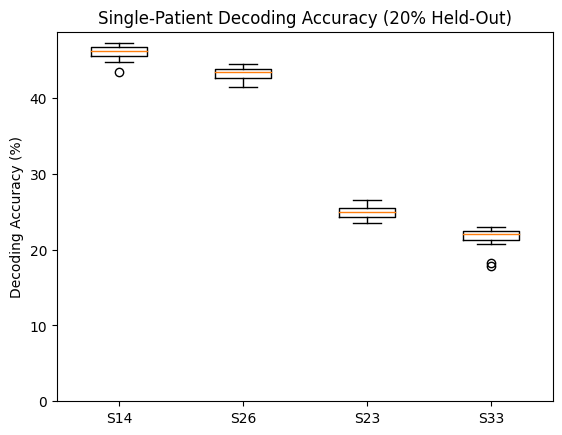

In [67]:
import matplotlib.pyplot as plt

plt.figure()
# plt.bar(range(len(bar_data)), bar_data, yerr=bar_err, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.boxplot([S14_data, S26_data, S23_data, S33_data])
plt.xticks(range(1, len(bar_data)+1), ['S14', 'S26', 'S23', 'S33'])
# plt.xlim([-0.75, len(bar_data) - 0.25])
plt.ylabel('Decoding Accuracy (%)')
plt.ylim(bottom=0)
plt.title('Single-Patient Decoding Accuracy (20% Held-Out)')
plt.show()

### Transfer Heatmap

In [4]:
import matplotlib.pyplot as plt
import numpy as np

#### Testing heatmap

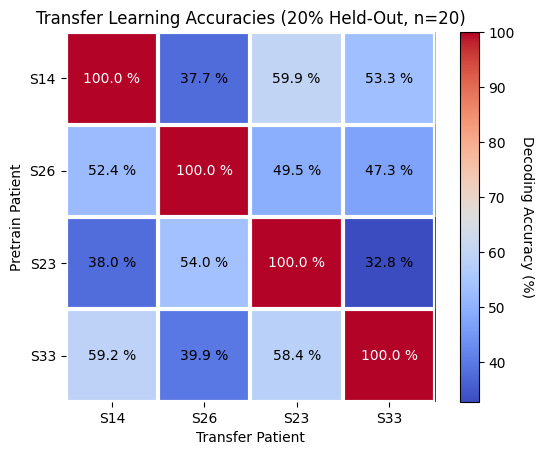

In [28]:
from visualization.transfer_results_vis import (combine_transfer_single,
                                                heatmap,
                                                annotate_heatmap) 

transfer_data = 100*np.random.rand(4, 4, 20)
single_data = 100*np.ones((4, 50))
pt_labels = ['S14', 'S26', 'S23', 'S33']

heatmap_data = combine_transfer_single(transfer_data, single_data)
im, cbar = heatmap(heatmap_data, pt_labels, pt_labels,
                   cmap='coolwarm',
                   cbarlabel="Decoding Accuracy (%)")
texts = annotate_heatmap(im, valfmt="{x:.1f} %")
ax = plt.gca()
ax.set_ylabel('Pretrain Patient')
ax.set_xlabel('Transfer Patient')
ax.set_title('Transfer Learning Accuracies (20% Held-Out, n=20)')
plt.show()



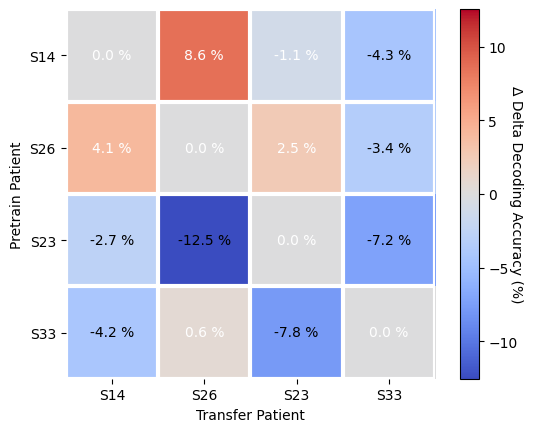

In [23]:
from visualization.transfer_results_vis import transform_col_by_diag

transfer_data = 100*np.random.rand(4, 4, 20)
single_data = 100*np.random.rand(4, 50)
pt_labels = ['S14', 'S26', 'S23', 'S33']

heatmap_data = combine_transfer_single(transfer_data, single_data)
delta_heatmap_data = transform_col_by_diag(heatmap_data)

im, cbar = heatmap(delta_heatmap_data, pt_labels, pt_labels,
                   cmap='coolwarm',
                   cbarlabel=u"\u0394 Delta Decoding Accuracy (%)")
texts = annotate_heatmap(im, valfmt="{x:.1f} %")
ax = plt.gca()
ax.set_ylabel('Pretrain Patient')
ax.set_xlabel('Transfer Patient')
im.set_clim(-max(abs(i) for i in im.get_clim()), max(abs(i) for i in im.get_clim()))
plt.show()

#### Heatmap CSV Data

In [50]:
S14_S33_tr = open_acc_csv(DATA_PATH + f'csv_accs/transfer_S14-S33{norm_ext}_acc{csv_misc_ext}.csv')
S14_S23_tr = open_acc_csv(DATA_PATH + f'csv_accs/transfer_S14-S23{norm_ext}_acc{csv_misc_ext}.csv')
S14_S26_tr = open_acc_csv(DATA_PATH + f'csv_accs/transfer_S14-S26{norm_ext}_acc{csv_misc_ext}.csv')

S26_S33_tr = open_acc_csv(DATA_PATH + f'csv_accs/transfer_S26-S33{norm_ext}_acc{csv_misc_ext}.csv')
S26_S23_tr = open_acc_csv(DATA_PATH + f'csv_accs/transfer_S26-S23{norm_ext}_acc{csv_misc_ext}.csv')
S26_S14_tr = open_acc_csv(DATA_PATH + f'csv_accs/transfer_S26-S14{norm_ext}_acc{csv_misc_ext}.csv')

S23_S33_tr = open_acc_csv(DATA_PATH + f'csv_accs/transfer_S23-S33{norm_ext}_acc{csv_misc_ext}.csv')
S23_S26_tr = open_acc_csv(DATA_PATH + f'csv_accs/transfer_S23-S26{norm_ext}_acc{csv_misc_ext}.csv')
S23_S14_tr = open_acc_csv(DATA_PATH + f'csv_accs/transfer_S23-S14{norm_ext}_acc{csv_misc_ext}.csv')

S33_S23_tr = open_acc_csv(DATA_PATH + f'csv_accs/transfer_S33-S23{norm_ext}_acc{csv_misc_ext}.csv')
S33_S26_tr = open_acc_csv(DATA_PATH + f'csv_accs/transfer_S33-S26{norm_ext}_acc{csv_misc_ext}.csv')
S33_S14_tr = open_acc_csv(DATA_PATH + f'csv_accs/transfer_S33-S14{norm_ext}_acc{csv_misc_ext}.csv')

In [51]:
np.shape(S14_S23_tr)

(50,)

#### Heatmap Pkl Data

In [5]:
from processing_utils.data_saving import load_pkl_accs

S14_S33_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S14]-S33{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S14_S23_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S14]-S23{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S14_S26_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S14]-S26{norm_ext}_acc{misc_ext}.pkl')[acc_key])


S26_S33_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S26]-S33{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S26_S23_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S26]-S23{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S26_S14_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S26]-S14{norm_ext}_acc{misc_ext}.pkl')[acc_key])

S23_S33_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S23]-S33{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S23_S26_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S23]-S26{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S23_S14_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S23]-S14{norm_ext}_acc{misc_ext}.pkl')[acc_key])

S33_S23_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S33]-S23{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S33_S26_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S33]-S26{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S33_S14_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S33]-S14{norm_ext}_acc{misc_ext}.pkl')[acc_key])

S14_tr = [S26_S14_tr, S23_S14_tr, S33_S14_tr]
S26_tr = [S14_S26_tr, S23_S26_tr, S33_S26_tr]
S23_tr = [S14_S23_tr, S26_S23_tr, S33_S23_tr]
S33_tr = [S14_S33_tr, S26_S33_tr, S23_S33_tr]

#### Heatmap Generation

In [76]:
transfer_data = np.zeros((4, 4, S14_S33_tr.shape[0]))
transfer_data[0, 1, :] = S14_S26_tr
transfer_data[0, 2, :] = S14_S23_tr
transfer_data[0, 3, :] = S14_S33_tr
transfer_data[1, 0, :] = S26_S14_tr
transfer_data[1, 2, :] = S26_S23_tr
transfer_data[1, 3, :] = S26_S33_tr
transfer_data[2, 0, :] = S23_S14_tr
transfer_data[2, 1, :] = S23_S26_tr
transfer_data[2, 3, :] = S23_S33_tr
transfer_data[3, 0, :] = S33_S14_tr
transfer_data[3, 1, :] = S33_S26_tr
transfer_data[3, 2, :] = S33_S23_tr
print(np.mean(transfer_data, axis=-1))
print()

single_data = np.zeros((4, S14_data.shape[0]))
single_data[0, :] = S14_data
single_data[1, :] = S26_data
single_data[2, :] = S23_data
single_data[3, :] = S33_data
print(np.mean(single_data, axis=-1))


[[ 0.         36.31041798 22.4534632  27.8125    ]
 [50.95678069  0.         22.89369889 27.84375   ]
 [50.11044148 36.16577712  0.         25.78125   ]
 [49.79333013 36.90734266 23.30848164  0.        ]]

[51.93817729 41.30443014 25.62089145 22.6875    ]


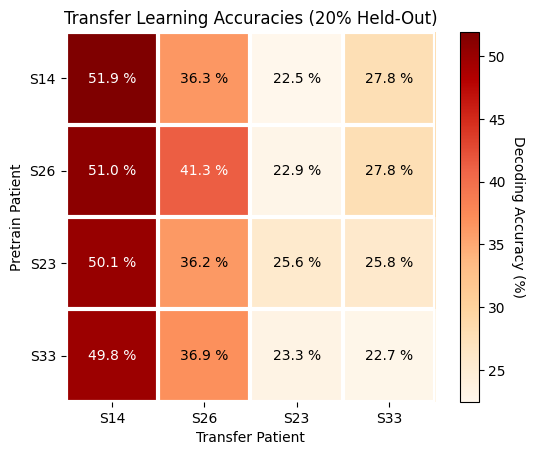

In [77]:
from visualization.transfer_results_vis import (combine_transfer_single,
                                                heatmap,
                                                annotate_heatmap) 

pt_labels = ['S14', 'S26', 'S23', 'S33']

heatmap_data = combine_transfer_single(transfer_data, single_data)
im, cbar = heatmap(heatmap_data, pt_labels, pt_labels,
                   cmap='OrRd',
                   cbarlabel="Decoding Accuracy (%)")
texts = annotate_heatmap(im, valfmt="{x:.1f} %")
ax = plt.gca()
ax.set_ylabel('Pretrain Patient')
ax.set_xlabel('Transfer Patient')
ax.set_title('Transfer Learning Accuracies (20% Held-Out)')
# im.set_clim(0, im.get_clim()[1])
plt.show()

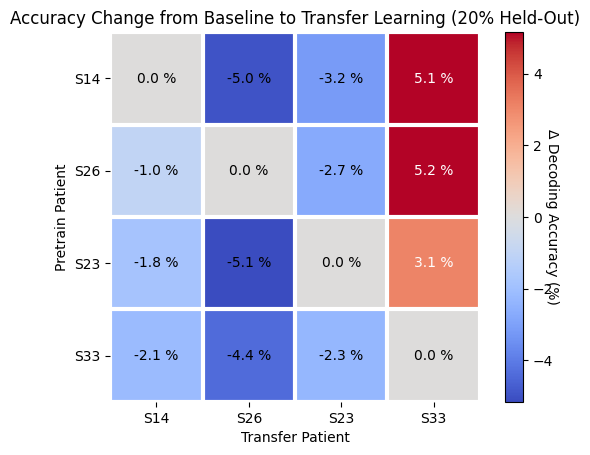

In [78]:
from visualization.transfer_results_vis import transform_col_by_diag

delta_heatmap_data = transform_col_by_diag(heatmap_data)

im, cbar = heatmap(delta_heatmap_data, pt_labels, pt_labels,
                   cmap='coolwarm',
                   cbarlabel=u"\u0394 Decoding Accuracy (%)")
texts = annotate_heatmap(im, valfmt="{x:.1f} %")
ax = plt.gca()
ax.set_ylabel('Pretrain Patient')
ax.set_xlabel('Transfer Patient')
ax.set_title('Accuracy Change from Baseline to Transfer Learning (20% Held-Out)')
im.set_clim(-max(abs(i) for i in im.get_clim()), max(abs(i) for i in im.get_clim()))
plt.show()

Significance Testing

In [72]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

p_vals = np.zeros((4, 4))
for i in range(p_vals.shape[0]):  # pretrain pt
    for j in range(p_vals.shape[1]):  # transfer pt - comparing this to single results
        if i == j:
            p_vals[i, j] = 1
        else:
            p_vals[i, j] = ttest_ind(transfer_data[i, j, :], single_data[j, :])[1]

corr_p_vals = multipletests(p_vals.flatten(), method='fdr_bh')[1].reshape(p_vals.shape)
print(corr_p_vals < 0.05)
print(corr_p_vals < 0.01)
print(corr_p_vals < 0.001)


[[False  True  True  True]
 [ True False  True  True]
 [ True  True False  True]
 [ True  True  True False]]
[[False  True  True  True]
 [ True False  True  True]
 [ True  True False  True]
 [ True  True  True False]]
[[False  True  True  True]
 [ True False  True  True]
 [ True  True False  True]
 [ True  True  True False]]


### Pickle File Append Testing

In [7]:
import pickle
import numpy as np

In [49]:
import os
def append_pickle_accs(filename, acc, cmat, acc_key='val_acc', cmat_key='cmat'):
    # load in previous data if it exists
    data = load_pickle_accs(filename)

    # append new data to loaded data list
    if acc_key not in data:
        data[acc_key] = []
        data[cmat_key] = []
    data[acc_key].append(acc)
    data[cmat_key].append(cmat)

    # save new data
    with open(filename, 'wb+') as f:
        pickle.dump(data, f, protocol=-1)

def load_pickle_accs(filename):
    if os.path.isfile(filename):
        with open(filename, 'rb') as f:
            return pickle.load(f)
    return {}

In [47]:
acc_a = 0.51
acc_b = 0.72
a = np.random.rand(10, 10)
b = np.random.rand(12, 12)

In [50]:
append_pickle_accs('test.pkl', acc_a, a)

In [51]:
data = load_pickle_accs('test.pkl')
print(data['val_acc'])
print(data['cmat'])

[0.51]
[array([[0.28675719, 0.41681722, 0.62853273, 0.97842388, 0.55574573,
        0.85582171, 0.10537804, 0.38224626, 0.52322628, 0.53505092],
       [0.4926172 , 0.28703895, 0.73809781, 0.52043229, 0.39983528,
        0.74920662, 0.8595306 , 0.27268484, 0.43451229, 0.11312774],
       [0.35112672, 0.32334831, 0.01240101, 0.38988865, 0.86967671,
        0.98662626, 0.87954584, 0.24275935, 0.90727148, 0.67597814],
       [0.79784336, 0.48396612, 0.87168447, 0.07477279, 0.92512213,
        0.13557174, 0.68605427, 0.61845451, 0.36423484, 0.65433419],
       [0.40520285, 0.1994872 , 0.43516321, 0.58821446, 0.82546165,
        0.9635285 , 0.25987699, 0.9678307 , 0.96853744, 0.79123349],
       [0.73644432, 0.02365778, 0.43727459, 0.02812753, 0.28545042,
        0.57720256, 0.92568262, 0.85006589, 0.91225086, 0.47950963],
       [0.6333286 , 0.27390641, 0.39928   , 0.2118137 , 0.62395248,
        0.09725715, 0.21794874, 0.99774195, 0.38224366, 0.24986484],
       [0.87914946, 0.20768893, 0

In [52]:
append_pickle_accs('test.pkl', acc_b, b)

In [53]:
data = load_pickle_accs('test.pkl')
print(data['val_acc'])
print(data['cmat'])

[0.51, 0.72]
[array([[0.28675719, 0.41681722, 0.62853273, 0.97842388, 0.55574573,
        0.85582171, 0.10537804, 0.38224626, 0.52322628, 0.53505092],
       [0.4926172 , 0.28703895, 0.73809781, 0.52043229, 0.39983528,
        0.74920662, 0.8595306 , 0.27268484, 0.43451229, 0.11312774],
       [0.35112672, 0.32334831, 0.01240101, 0.38988865, 0.86967671,
        0.98662626, 0.87954584, 0.24275935, 0.90727148, 0.67597814],
       [0.79784336, 0.48396612, 0.87168447, 0.07477279, 0.92512213,
        0.13557174, 0.68605427, 0.61845451, 0.36423484, 0.65433419],
       [0.40520285, 0.1994872 , 0.43516321, 0.58821446, 0.82546165,
        0.9635285 , 0.25987699, 0.9678307 , 0.96853744, 0.79123349],
       [0.73644432, 0.02365778, 0.43727459, 0.02812753, 0.28545042,
        0.57720256, 0.92568262, 0.85006589, 0.91225086, 0.47950963],
       [0.6333286 , 0.27390641, 0.39928   , 0.2118137 , 0.62395248,
        0.09725715, 0.21794874, 0.99774195, 0.38224366, 0.24986484],
       [0.87914946, 0.20768

### Muli-Pt Transfer Results

In [6]:
from processing_utils.data_saving import load_pkl_accs

# double pt results
S14S26_S33_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S14-S26]-S33{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S14S23_S33_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S14-S23]-S33{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S26S14_S33_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S26-S14]-S33{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S26S23_S33_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S26-S23]-S33{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S23S14_S33_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S23-S14]-S33{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S23S26_S33_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S23-S26]-S33{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S33_mp2_tr = [S14S26_S33_tr, S14S23_S33_tr, S26S14_S33_tr, S26S23_S33_tr, S23S14_S33_tr, S23S26_S33_tr]

S14S26_S23_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S14-S26]-S23{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S14S33_S23_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S14-S33]-S23{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S26S14_S23_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S26-S14]-S23{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S26S33_S23_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S26-S33]-S23{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S33S14_S23_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S33-S14]-S23{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S33S26_S23_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S33-S26]-S23{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S23_mp2_tr = [S14S26_S23_tr, S14S33_S23_tr, S26S14_S23_tr, S26S33_S23_tr, S33S14_S23_tr, S33S26_S23_tr]

S14S23_S26_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S14-S23]-S26{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S14S33_S26_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S14-S33]-S26{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S23S14_S26_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S23-S14]-S26{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S23S33_S26_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S23-S33]-S26{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S33S14_S26_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S33-S14]-S26{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S33S23_S26_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S33-S23]-S26{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S26_mp2_tr = [S14S23_S26_tr, S14S33_S26_tr, S23S14_S26_tr, S23S33_S26_tr, S33S14_S26_tr, S33S23_S26_tr]

S26S23_S14_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S26-S23]-S14{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S26S33_S14_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S26-S33]-S14{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S23S26_S14_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S23-S26]-S14{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S23S33_S14_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S23-S33]-S14{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S33S26_S14_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S33-S26]-S14{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S33S23_S14_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S33-S23]-S14{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S14_mp2_tr = [S26S23_S14_tr, S26S33_S14_tr, S23S26_S14_tr, S23S33_S14_tr, S33S26_S14_tr, S33S23_S14_tr]

#triple pt results
S14S26S23_S33_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S14-S26-S23]-S33{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S14S23S26_S33_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S14-S23-S26]-S33{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S26S14S23_S33_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S26-S14-S23]-S33{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S26S23S14_S33_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S26-S23-S14]-S33{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S23S14S26_S33_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S23-S14-S26]-S33{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S23S26S14_S33_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S23-S26-S14]-S33{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S33_mp3_tr = [S14S26S23_S33_tr, S14S23S26_S33_tr, S26S14S23_S33_tr, S26S23S14_S33_tr, S23S14S26_S33_tr, S23S26S14_S33_tr]

S14S26S33_S23_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S14-S26-S33]-S23{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S14S33S26_S23_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S14-S33-S26]-S23{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S26S14S33_S23_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S26-S14-S33]-S23{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S26S33S14_S23_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S26-S33-S14]-S23{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S33S14S26_S23_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S33-S14-S26]-S23{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S33S26S14_S23_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S33-S26-S14]-S23{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S23_mp3_tr = [S14S26S33_S23_tr, S14S33S26_S23_tr, S26S14S33_S23_tr, S26S33S14_S23_tr, S33S14S26_S23_tr, S33S26S14_S23_tr]

S14S23S33_S26_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S14-S23-S33]-S26{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S14S33S23_S26_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S14-S33-S23]-S26{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S23S14S33_S26_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S23-S14-S33]-S26{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S23S33S14_S26_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S23-S33-S14]-S26{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S33S14S23_S26_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S33-S14-S23]-S26{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S33S23S14_S26_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S33-S23-S14]-S26{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S26_mp3_tr = [S14S23S33_S26_tr, S14S33S23_S26_tr, S23S14S33_S26_tr, S23S33S14_S26_tr, S33S14S23_S26_tr, S33S23S14_S26_tr]

S26S23S33_S14_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S26-S23-S33]-S14{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S26S33S23_S14_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S26-S33-S23]-S14{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S23S26S33_S14_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S23-S26-S33]-S14{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S23S33S26_S14_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S23-S33-S26]-S14{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S33S26S23_S14_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S33-S26-S23]-S14{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S33S23S26_S14_tr = 100*np.array(load_pkl_accs(DATA_PATH + f'pkl_accs/transfer_[S33-S23-S26]-S14{norm_ext}_acc{misc_ext}.pkl')[acc_key])
S14_mp3_tr = [S26S23S33_S14_tr, S26S33S23_S14_tr, S23S26S33_S14_tr, S23S33S26_S14_tr, S33S26S23_S14_tr, S33S23S26_S14_tr]


In [7]:
S14_mp_labels = ['S14', 'S26\n->S14', 'S23\n->S14', 'S33\n->S14', '(S26,\nS23)\n->S14', '(S26,\nS33)\n->S14',
                 '(S23,\nS33)\n->S14', '(S23,\nS26)\n->S14', '(S33,\nS26)\n->S14', '(S33,\nS23)\n->S14',
                 '(S26,\nS23,\nS33)\n->S14', '(S26,\nS33,\nS23)\n->S14', '(S23,\nS26,\nS33)\n->S14',
                 '(S23,\nS33,\nS26)\n->S14', '(S33,\nS26,\nS23)\n->S14', '(S33,\nS23,\nS26)\n->S14']

S26_mp_labels = ['S26', 'S14\n->S26', 'S23\n->S26', 'S33\n->S26', '(S14,\nS23\n->S26', '(S14,\nS33\n->S26',
                 '(S23,\nS14\n->S26', '(S23,\nS33\n->S26', '(S33,\nS14\n->S26', '(S33,\nS23\n->S26',
                 '(S14,\nS23,\nS33\n->S26', '(S14,\nS33,\nS23\n->S26', '(S23,\nS14,\nS33\n->S26',
                 '(S23,\nS33,\nS14\n->S26', '(S33,\nS14,\nS23\n->S26', '(S33,\nS23,\nS14\n->S26']

S23_mp_labels = ['S23', 'S14\n->S23', 'S26\n->S23', 'S33\n->S23', '(S14,\nS26\n->S23', '(S14,\nS33\n->S23',
                 '(S26,\nS14\n->S23', '(S26,\nS33\n->S23', '(S33,\nS14\n->S23', '(S33,\nS26\n->S23',
                 '(S14,\nS26,\nS33\n->S23', '(S14,\nS33,\nS26\n->S23', '(S26,\nS14,\nS33\n->S23',
                 '(S26,\nS33,\nS14\n->S23', '(S33,\nS14,\nS26\n->S23', '(S33,\nS26,\nS14\n->S23']

S33_mp_labels = ['S33', 'S14\n->S33', 'S26\n->S33', 'S23\n->S33', '(S14,\nS26\n->S33', '(S14,\nS23\n->S33',
                 '(S26,\nS14\n->S33', '(S26,\nS23\n->S33', '(S23,\nS14\n->S33', '(S23,\nS26\n->S33',
                 '(S14,\nS26,\nS23\n->S33', '(S14,\nS23,\nS26\n->S33', '(S26,\nS14,\nS23\n->S33',
                 '(S26,\nS23,\nS14\n->S33', '(S23,\nS14,\nS26\n->S33', '(S23,\nS26,\nS14\n->S33']

In [9]:
from visualization.transfer_results_vis import multi_pt_box_plot

#### S14 Multi-Pt Transfer

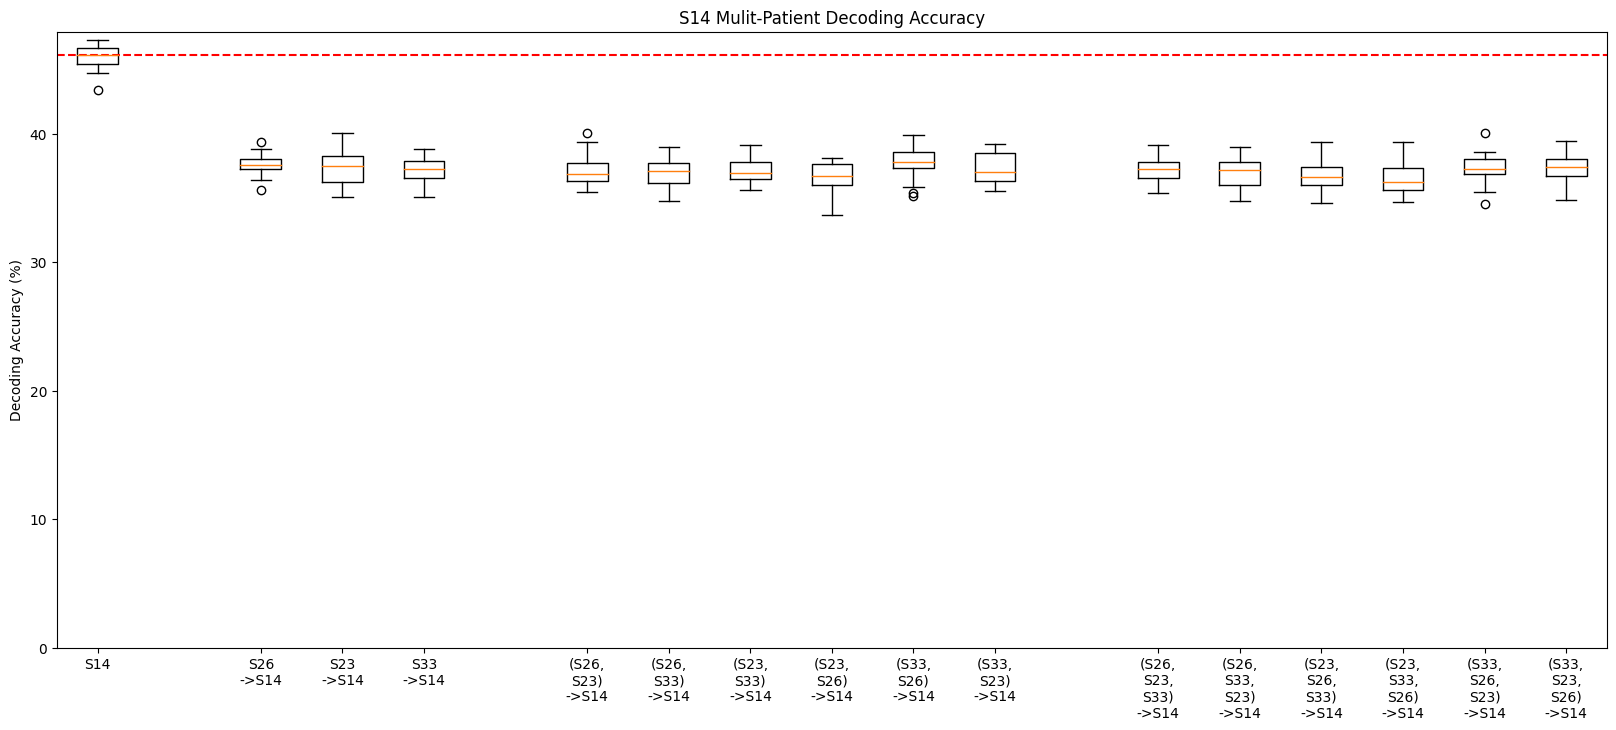

In [10]:
multi_pt_box_plot([S14_data], S14_tr, S14_mp2_tr, S14_mp3_tr, S14_mp_labels, 'S14')

#### S26 Multi-Pt Transfer

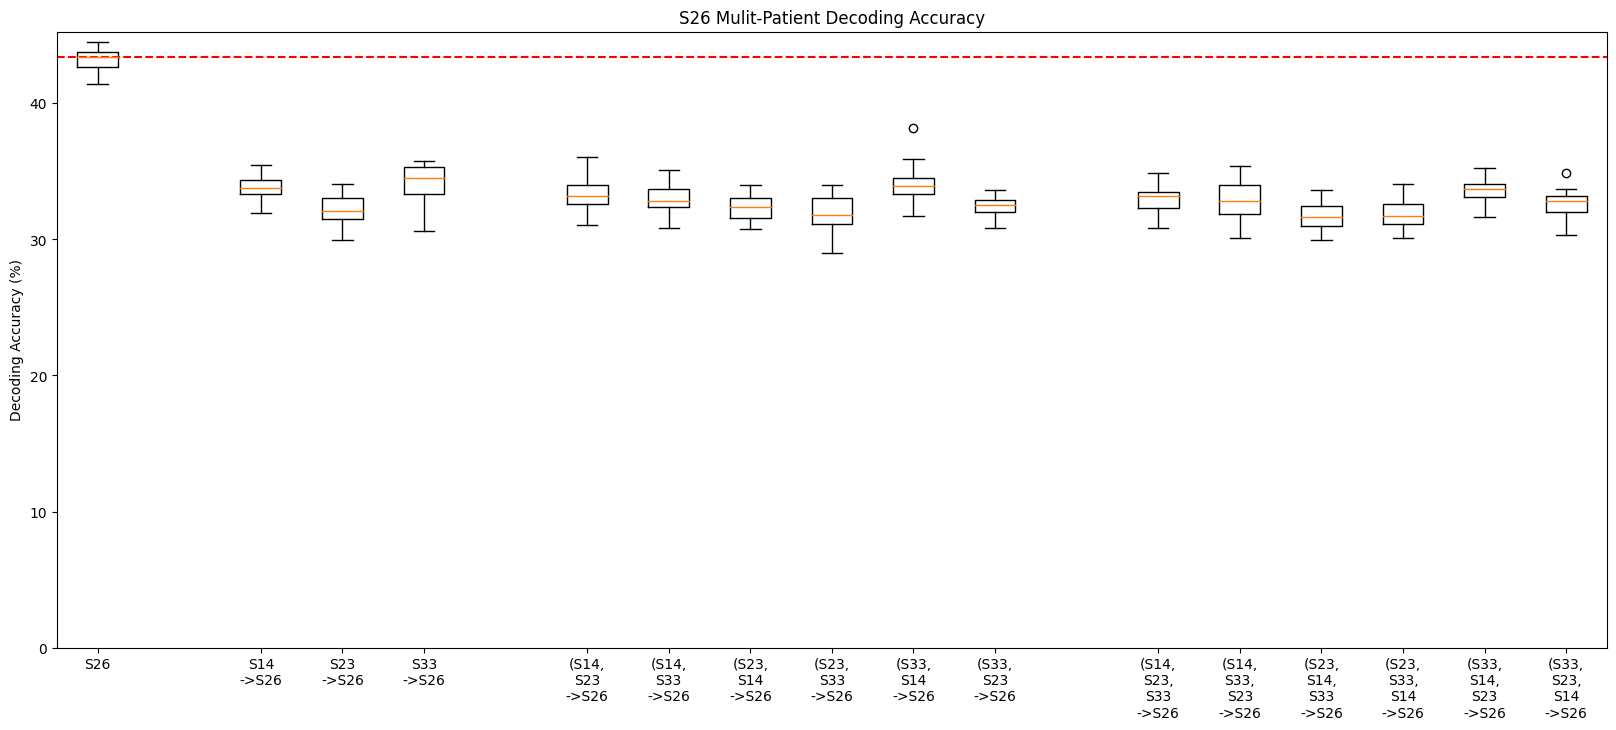

In [11]:
multi_pt_box_plot([S26_data], S26_tr, S26_mp2_tr, S26_mp3_tr, S26_mp_labels, 'S26')

#### S23 Multi-Pt Transfer

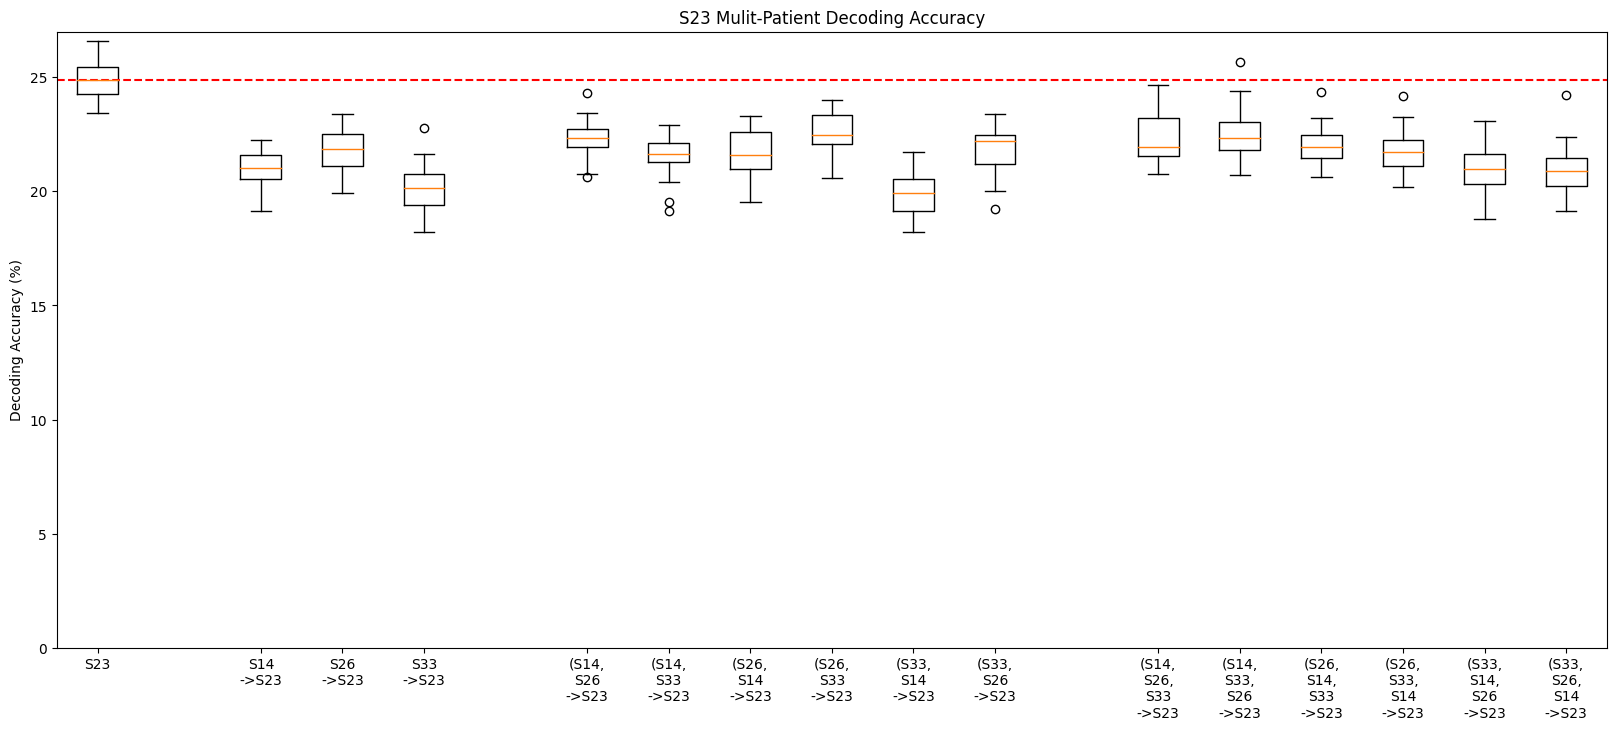

In [12]:
multi_pt_box_plot([S23_data], S23_tr, S23_mp2_tr, S23_mp3_tr, S23_mp_labels, 'S23')

#### S33 Multi-Pt Transfer

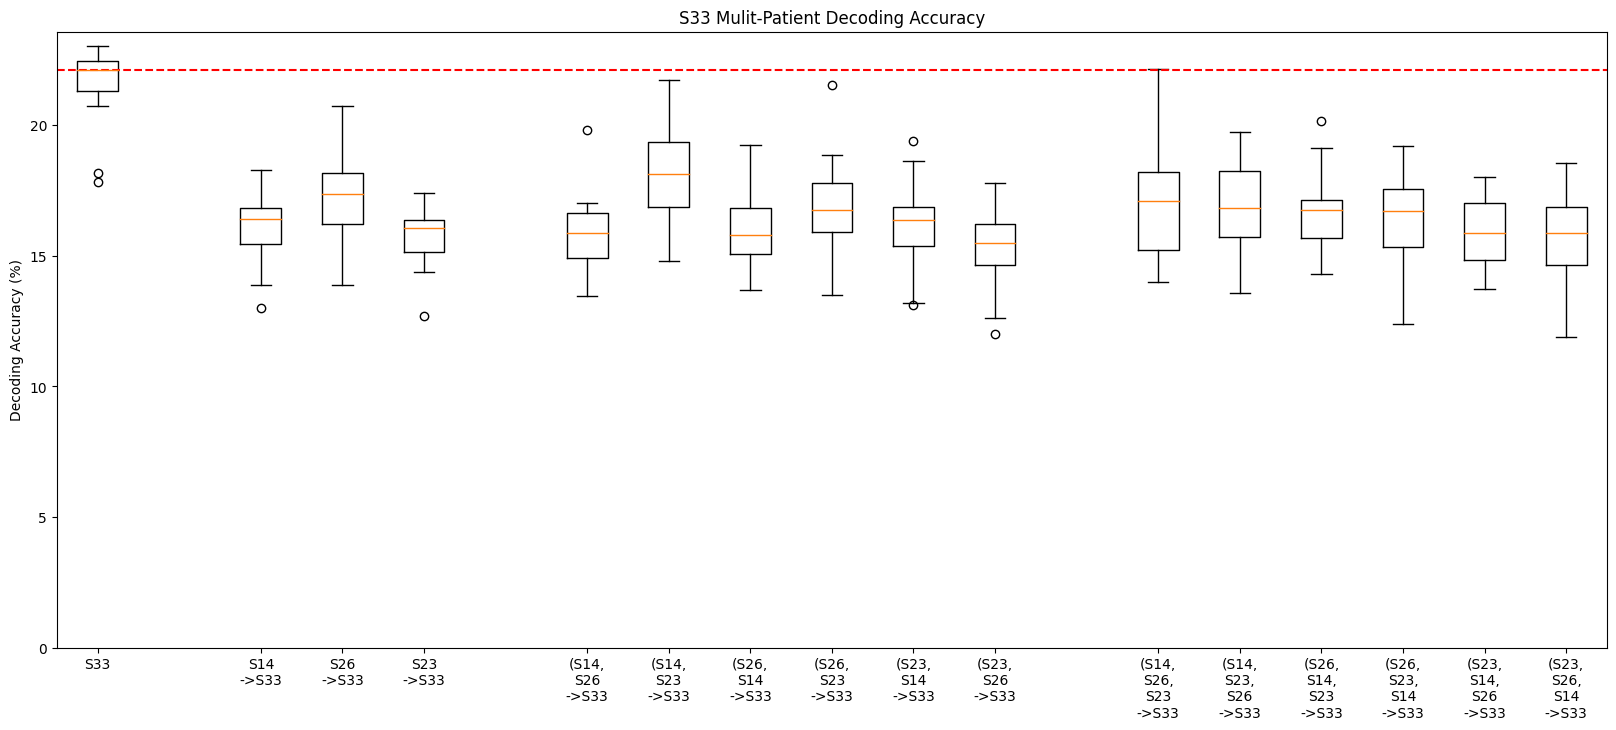

In [13]:
multi_pt_box_plot([S33_data], S33_tr, S33_mp2_tr, S33_mp3_tr, S33_mp_labels, 'S33')